<h1><b>Classification Analysis of Happiness</b></h1>

2023-12-13 Classification HW. Yvonne.

<h1>About Dataset</h1>


The dataset we will be working with is based on a survey conducted where people rated different metrics of their city on a scale of 5 and answered if they are happy or unhappy. It includes the following features:

* **infoavail**: Availability of information about city services.
* **housecost**: Cost of housing in the city.
* **schoolquality**: Overall quality of public schools.
* **policetrust**: Trust in the local police.
* **streetquality**: Maintenance of streets and sidewalks.
* **events**: Availability of social community events.
* **happy**: Decision attribute indicating happiness, with values 0 (unhappy) and 1 (happy).

<h1>Load libraries & data</h1>

In [93]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.tree import plot_tree

In [46]:
# Load the dataset
df = pd.read_csv('./happydata.csv')

<h1>Basic Analysis</h1>

In [47]:
df.head()

,infoavail,housecost,schoolquality,policetrust,streetquality,ëvents,happy
0,3,3,3,4,2,4,0
1,3,2,3,5,4,3,0
2,5,3,3,3,3,5,1
3,5,4,3,3,3,5,0
4,5,4,3,3,3,5,0


In [48]:
df.tail()

,infoavail,housecost,schoolquality,policetrust,streetquality,ëvents,happy
138,5,3,3,1,3,5,0
139,5,2,3,4,2,5,1
140,5,3,3,4,4,5,1
141,4,3,3,4,4,5,0
142,5,3,2,5,5,5,0


In [49]:
# Explore the dataset
print("Dataset shape:", df.shape)
print("Columns in the dataset:", df.columns)

Dataset shape: (143, 7)
Columns in the dataset: Index(['infoavail', 'housecost', 'schoolquality', 'policetrust',
       'streetquality', 'ëvents', 'happy'],
      dtype='object')


In [50]:
# Check for missing values
print("\nMissing values:\n", df.isnull().sum())


Missing values:
 infoavail        0
housecost        0
schoolquality    0
policetrust      0
streetquality    0
ëvents           0
happy            0
dtype: int64


In [51]:
# Check for duplicates
print("\nNumber of duplicate rows:", df.duplicated().sum())


Number of duplicate rows: 18


In [86]:
# Handle duplicates
df.drop_duplicates(inplace=True)

# Updated dataset after handling missing values and duplicates
print("\nDataset shape after handling missing values and duplicates:", df.shape)


Dataset shape after handling missing values and duplicates: (125, 7)


In [87]:
# Check data types
df.dtypes

infoavail        int64
housecost        int64
schoolquality    int64
policetrust      int64
streetquality    int64
ëvents           int64
happy            int64
dtype: object

<h1>Outlier Detection</h1>

In [55]:
# Define the z-score threshold for outlier detection
z_score_threshold = 3

# Loop through each column and detect outliers
for column in df.columns:
    z_scores = np.abs(stats.zscore(df[column]))
    outliers = np.where(z_scores > z_score_threshold)
    
    print("Column:", column)
    print("Number of outliers:", len(outliers[0]))
    print("Indices of outliers:", outliers[0])
    print()

Column: infoavail
Number of outliers: 1
Indices of outliers: [44]

Column: housecost
Number of outliers: 0
Indices of outliers: []

Column: schoolquality
Number of outliers: 0
Indices of outliers: []

Column: policetrust
Number of outliers: 0
Indices of outliers: []

Column: streetquality
Number of outliers: 0
Indices of outliers: []

Column: ëvents
Number of outliers: 2
Indices of outliers: [ 97 118]

Column: happy
Number of outliers: 0
Indices of outliers: []



In [56]:
# Define the z-score threshold for outlier detection
z_score_threshold = 3

# Create a copy of the dataset
data_no_outliers = df.copy()

# Loop through each column and remove outliers
for column in df.columns:
    z_scores = np.abs(stats.zscore(df[column]))
    outliers = np.where(z_scores > z_score_threshold)
    
    # Remove outliers from the copy of the dataset
    data_no_outliers = data_no_outliers.drop(outliers[0])

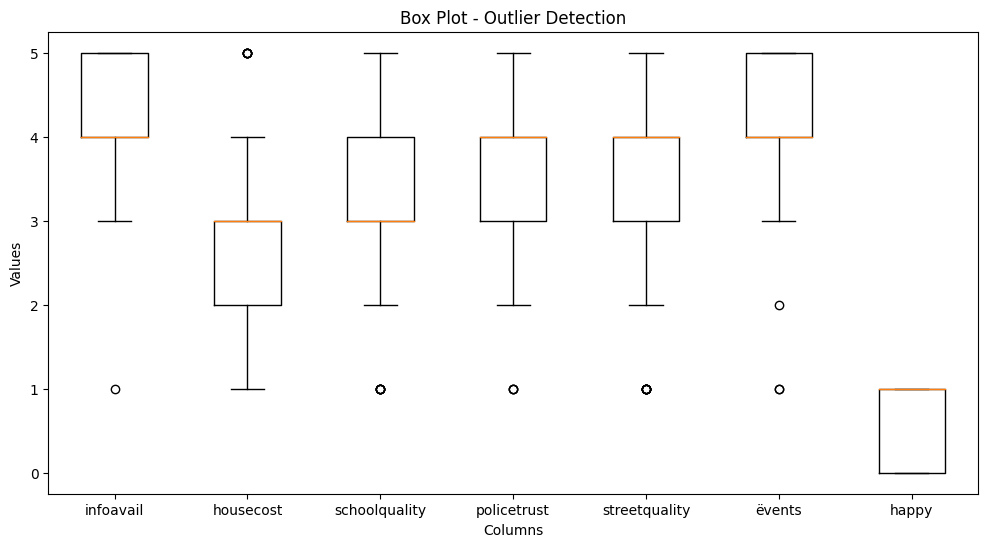

In [57]:
# Create box plots for each column
plt.figure(figsize=(12, 6))
plt.boxplot(df.values, labels=df.columns)
plt.title('Box Plot - Outlier Detection')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.show()

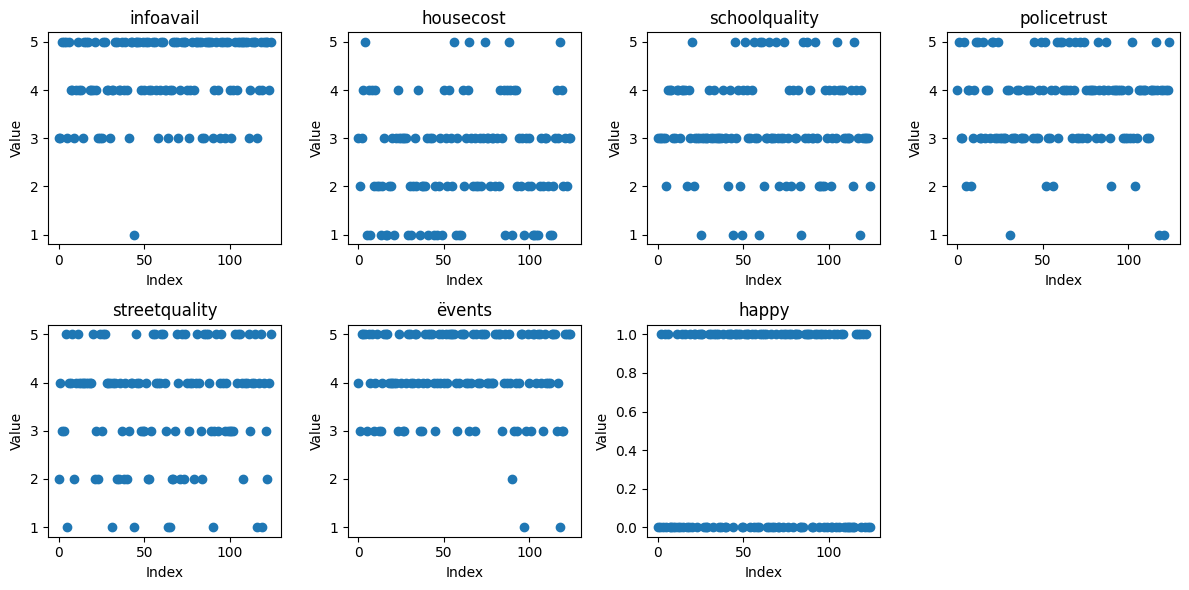

In [58]:
# Create scatter plots for each column
plt.figure(figsize=(12, 6))
for i, column in enumerate(df.columns):
    plt.subplot(2, 4, i+1)
    plt.scatter(range(len(df)), df[column])
    plt.title(column)
    plt.xlabel('Index')
    plt.ylabel('Value')
plt.tight_layout()
plt.show()

<h1>Data exploration</h1>

**Descriptive statistics**

In [59]:
# Calculate descriptive statistics
data_no_outliers.describe()

,infoavail,housecost,schoolquality,policetrust,streetquality,ëvents,happy
count,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000
mean,4.303279,2.573770,3.237705,3.704918,3.565574,4.188525,0.500000
std,0.811990,1.112796,0.971097,0.915329,1.164117,0.875110,0.502062
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,2.000000,3.000000,3.000000,3.000000,4.000000,0.000000
50%,4.500000,3.000000,3.000000,4.000000,4.000000,4.000000,0.500000
75%,5.000000,3.000000,4.000000,4.000000,4.000000,5.000000,1.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000


**Histograms**

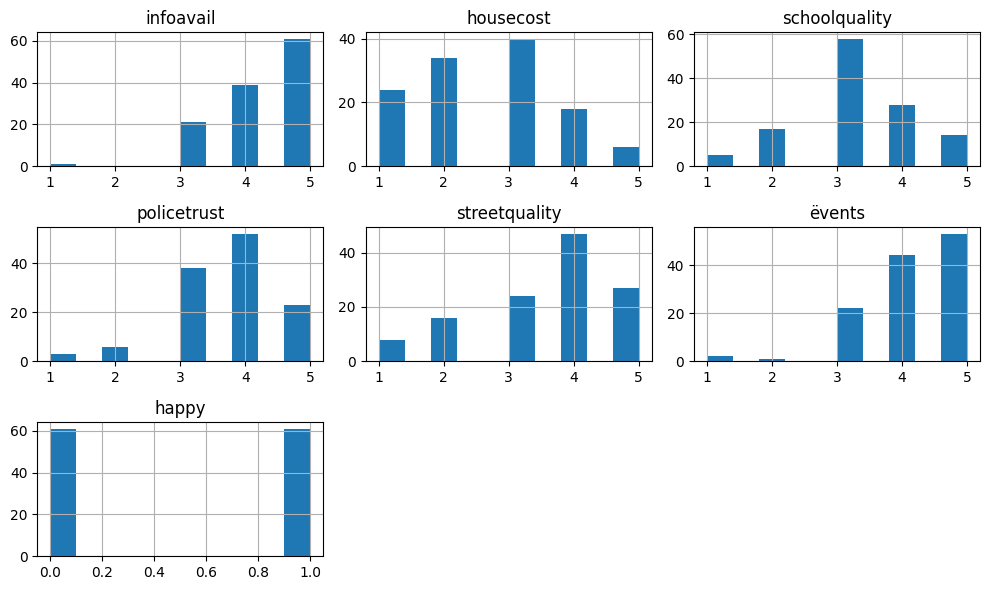

In [60]:
# Create histograms for each variable
data_no_outliers.hist(figsize=(10, 6))
plt.tight_layout()
plt.show()

<h1>Other Data Visualizations</h1>

**Bar charts**

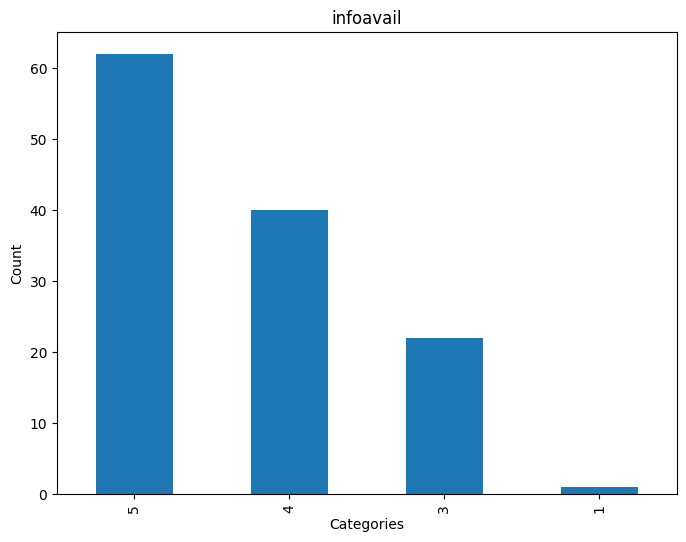

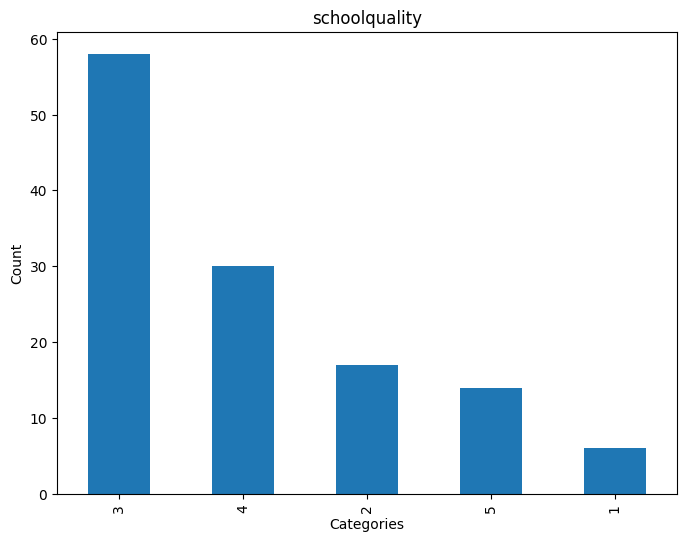

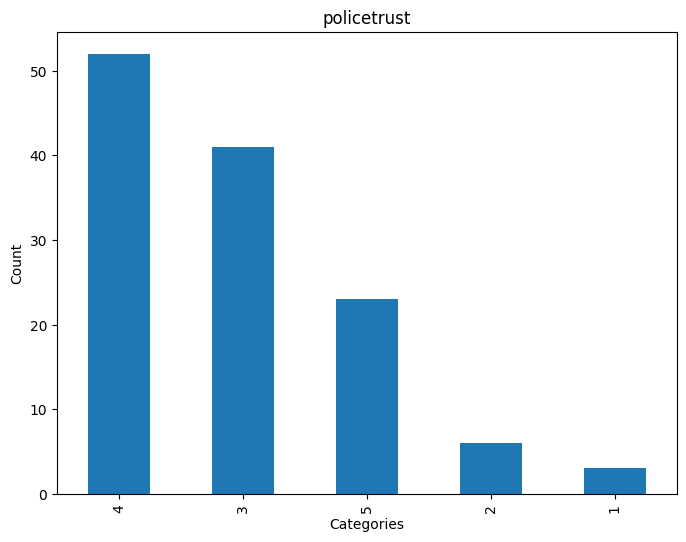

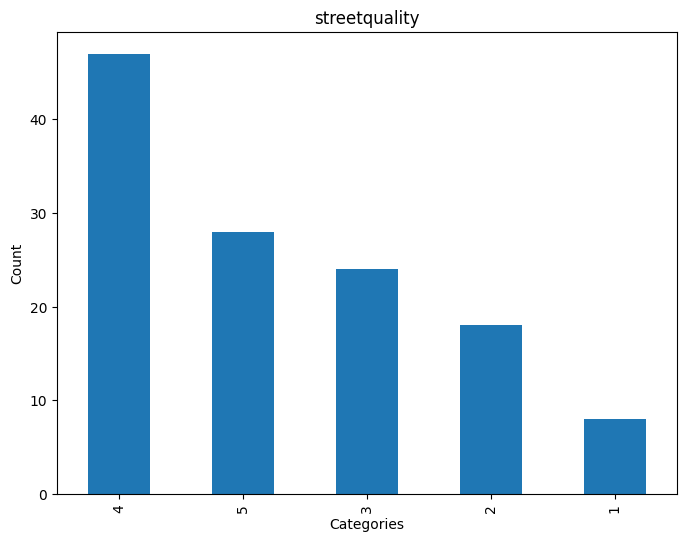

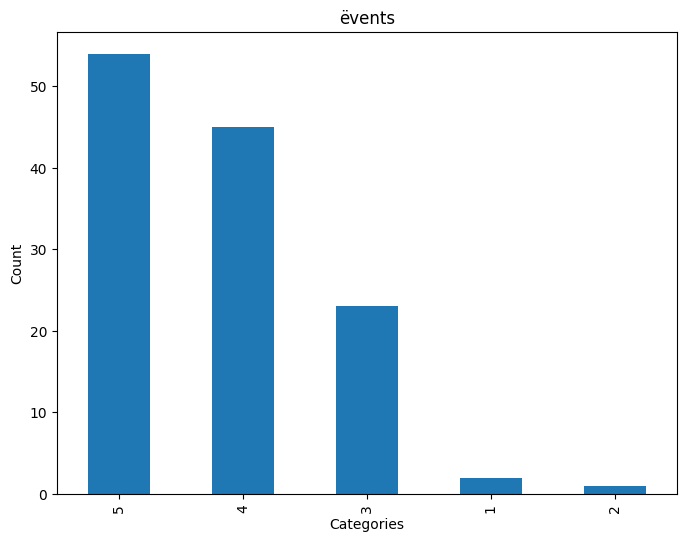

In [61]:
cat_vars = ['infoavail', 'schoolquality', 'policetrust', 'streetquality', 'ëvents']
for var in cat_vars:
    plt.figure(figsize=(8, 6))
    df[var].value_counts().plot(kind='bar')
    plt.title(var)
    plt.xlabel('Categories')
    plt.ylabel('Count')
    plt.show()

**Box plots**

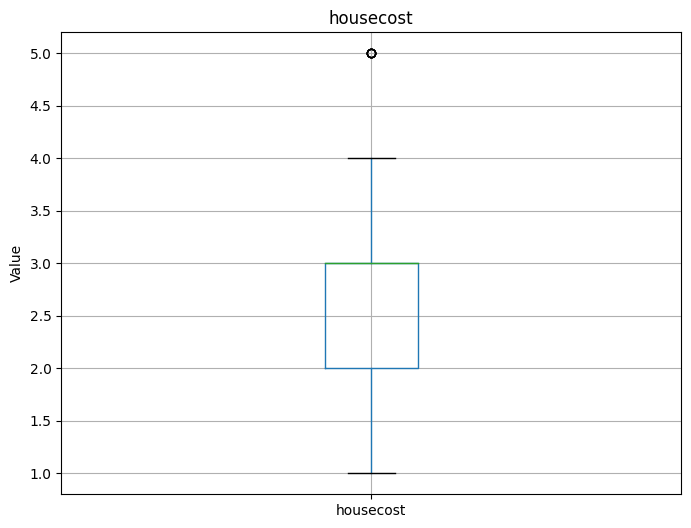

In [62]:
num_vars = ['housecost']
for var in num_vars:
    plt.figure(figsize=(8, 6))
    df.boxplot(column=var)
    plt.title(var)
    plt.ylabel('Value')
    plt.show()

**Scatter plot**

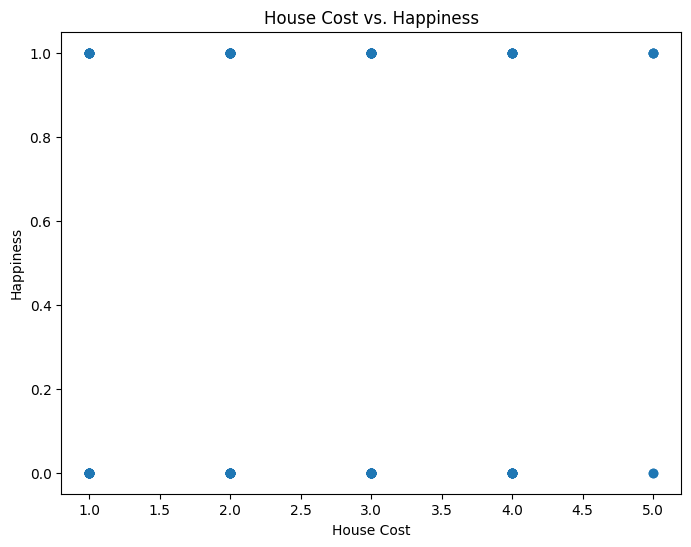

In [63]:
plt.figure(figsize=(8, 6))
plt.scatter(df['housecost'], df['happy'])
plt.title('House Cost vs. Happiness')
plt.xlabel('House Cost')
plt.ylabel('Happiness')
plt.show()

**Pair plots**

<Figure size 800x600 with 0 Axes>

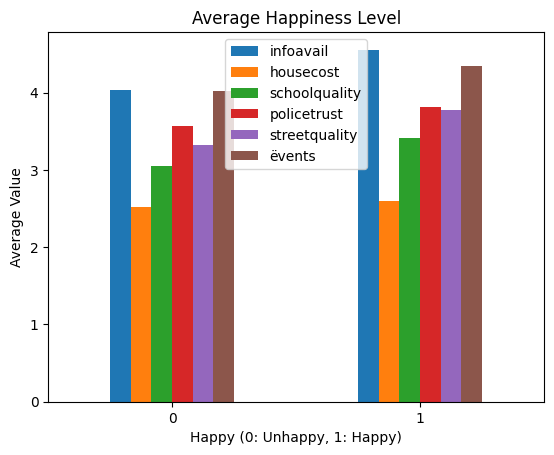

In [64]:
# Bar plots
plt.figure(figsize=(8, 6))
df.groupby('happy').mean().plot(kind='bar')
plt.title('Average Happiness Level')
plt.xlabel('Happy (0: Unhappy, 1: Happy)')
plt.ylabel('Average Value')
plt.legend(loc='upper center')
plt.xticks(rotation=0)
plt.show()

<h1><center style="color:#159364; font-family:cursive;">Model Building</center></h1>

In [77]:
# Assuming your dataset is in a DataFrame called df
x = df.drop('happy', axis=1)
y = df['happy']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

**Decision Tree**

In [79]:
# Create a decision tree classifier
clf = DecisionTreeClassifier()

# Train the classifier on the training data
clf.fit(x_train, y_train)

DecisionTreeClassifier()

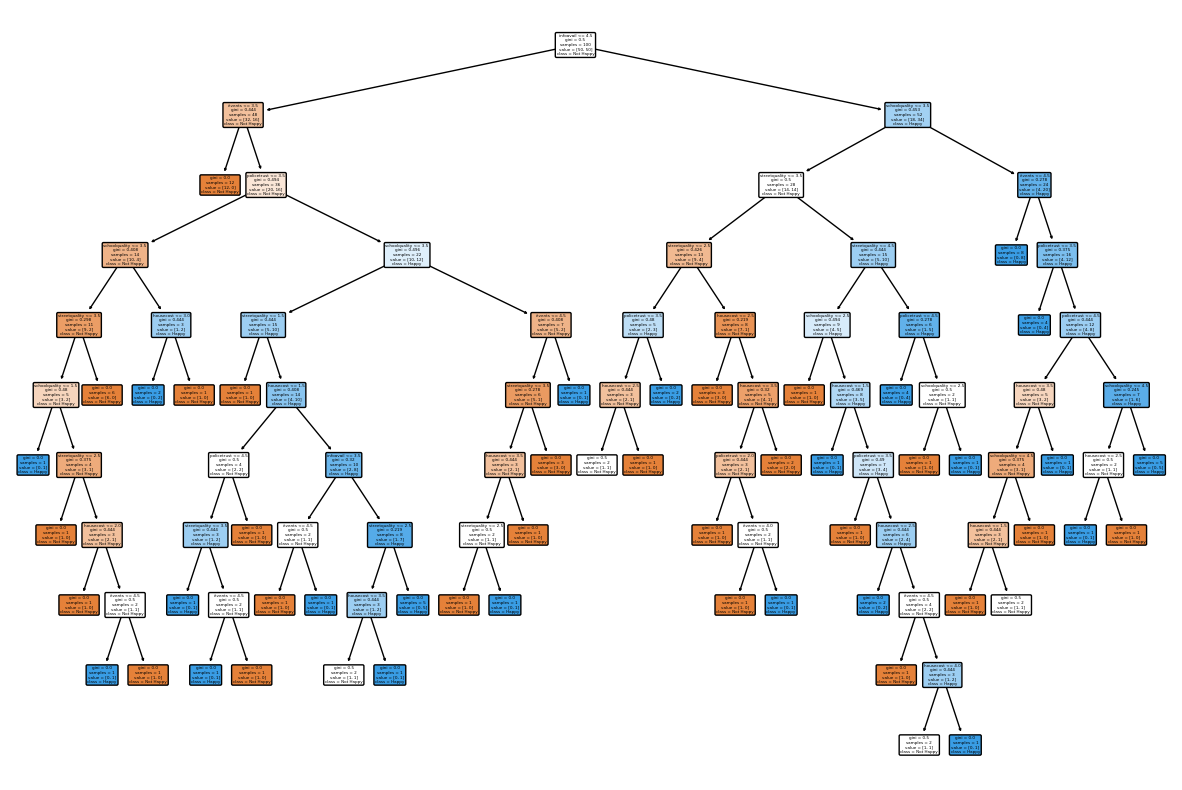

In [99]:
# Plot the decision tree
plt.figure(figsize=(15, 10))
plot_tree(clf, filled=True, feature_names=x_train.columns, class_names=['Not Happy', 'Happy'], rounded=True)
plt.show()

**Prediction**

In [84]:
# Make predictions on the testing data
y_pred = clf.predict(x_test)
print(y_pred)

# Print actual and predicted labels side by side
result = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(result)

[0 0 0 1 0 0 1 1 0 1 1 0 1 0 0 0 1 0 1 0 1 0 0 1 0]
     Actual  Predicted
19        0          0
48        1          0
42        0          0
88        0          1
63        1          0
106       0          0
67        0          1
141       0          1
108       1          0
5         1          1
31        0          1
132       1          0
50        0          1
111       1          0
20        1          0
89        1          0
11        0          1
116       0          0
12        1          1
130       0          0
55        1          1
90        1          0
0         0          0
30        1          1
36        1          0


**Model Assessment**

In [100]:
# Evaluate the performance of the decision tree
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.4


**Accuracy**: 0.4 -> This means that the model correctly predicted the target variable in 40% of the cases in the testing set.

In [102]:
# Other evaluation metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Precision: 0.4
Recall: 0.3076923076923077
F1 Score: 0.34782608695652173


**Precision**: 0.4 -> The precision score of 0.4 indicates that approximately 40% of the instances predicted as "happy" were actually labeled correctly.

**Recall**: 0.3077 -> The recall score of 0.3077 suggests that the model captured around 30.77% of the actual positive instances.

**F1-score**: 0.3478 -> The F1-score, which is the harmonic mean of precision and recall. With an F1-score of 0.3478, the model's performance is moderate in terms of balancing precision and recall.

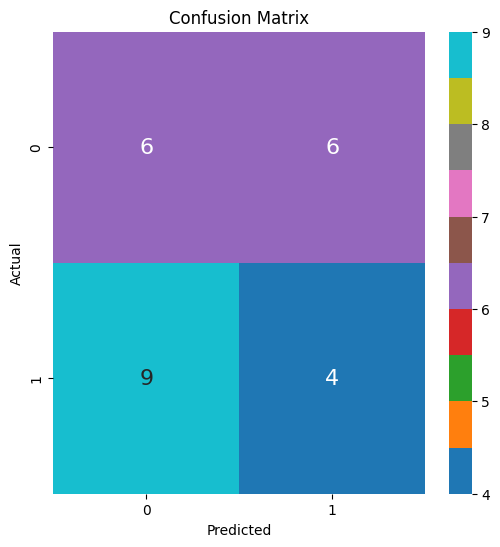

In [97]:
# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='tab10', annot_kws={"size": 16})
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

<h1>Conclusion</h1>

The analysis suggests that city metrics, such as the availability of information, school quality, police trust, street quality, and social community events, can have an impact on residents' happiness. However, model assessment shows the model's weak performance, indicates the need for additional exploration and refinement to enhance its effectiveness.
